<a href="https://colab.research.google.com/github/snghynn/ESAA-YB/blob/main/ESAA_0414_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[337,  20],
       [ 30, 182]])

* 정확도

In [7]:
from sklearn.metrics import accuracy_score 
print(round(accuracy_score(y, y_pred), 3))

0.912


* 정밀도

In [6]:
from sklearn.metrics import precision_score 
print(round(precision_score(y,y_pred), 3))

0.901


* 재현율

In [8]:
from sklearn.metrics import recall_score 
print(round(recall_score(y,y_pred),3))

0.858


* F1 score

In [9]:
from sklearn.metrics import f1_score 
print(round(f1_score(y, y_pred), 3))

0.879


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [10]:
from sklearn.preprocessing import Binarizer
pred_proba=model_lor.predict_proba(X)
pred_proba1=pred_proba[:,1].reshape(-1,1)
binarizer=Binarizer(threshold=0.1) # y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)로도 가능!
y_pred2=binarizer.transform(pred_proba1)

In [13]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기


print('오차 행렬 :\n', confusion_matrix(y, y_pred))
print('정확도 :', round(accuracy_score(y, y_pred), 3))
print('정밀도 :', round(precision_score(y,y_pred), 3))
print('재현율 :', round(recall_score(y,y_pred),3))
print('f1 score :', round(f1_score(y, y_pred), 3))

오차 행렬 :
 [[337  20]
 [ 30 182]]
정확도 : 0.912
정밀도 : 0.901
재현율 : 0.858
f1 score : 0.879


* ROC 곡선 시각화

In [14]:
from sklearn.metrics import roc_curve 
probas = model_lor.predict_proba(X) 
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

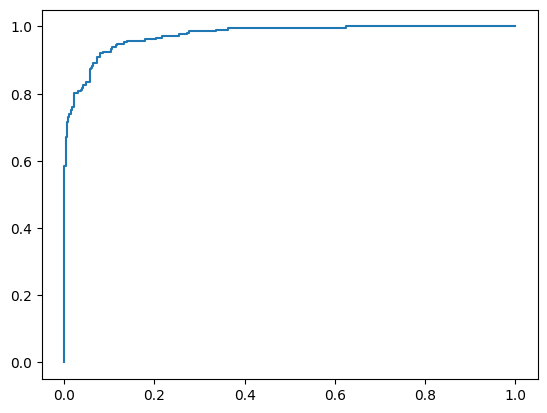

In [15]:
import matplotlib.pyplot as plt 
plt.plot(fpr, tpr, label="ROC")

* ROC AUC 값

In [17]:
from sklearn.metrics import roc_auc_score
print(round(roc_auc_score(y, y_pred), 3))

0.901
